In [39]:
options(warn=-1)

# Text Mining para Business Analytics (com R)

## Associação e Sumarização

## Aula #05

**Professor: Leandro Krug Wives** <font color=LightSteelBlue> - lwives@inf.ufrgs.br </font>

**Assistente: Brenda Salenave Santana** <font color=LightSteelBlue> - bssantana@inf.ufrgs.br </font>


## Mineração de Texto
## <font color=MidnightBlue> Tarefas Gerais </font>

- <s><font color=Gainsboro>Classificação</font></s>
- <s><font color=Gainsboro>Agrupamento</font></s>
- Associação
    - Descoberta de associações, correlações, sequências (temporais)
- Sumarização

# <center><font color=Navy> Associação </font></center>

## <font color=MidnightBlue> Associações </font>

- Objetivo: descobrir padrões que descrevem características dos documentos ou da base de documentos
- Regras associativas para identificar a probabilidade condicional entre temas, conceitos ou atributos

- Análise da influência:
    - Exemplo do WallMart: “Fralda x Cerveja”
    

    - Case da TV por assinatura:
    
| Associação             	| Grau de Associação 	|
|------------------------	|--------------------	|
| Imagem → Qualidade     	| 80%                	|
| Plano X → Custo        	| 66.67%             	|
| Concorrência → Filmes  	| 58.3%              	|
| Filmes → Repetição     	| 39.5%              	|
| Atendimento → Demora   	| 37.5%              	|
| Concorrência → Custo   	| 33.3%              	|
| Filmes  → Qualidade    	| 18.4%              	|
| Filmes → Concorrência  	| 6.1%               	|
| Filmes → Pay per  view 	| 6.1%               	|
| Filmes → Lançamento    	| 4.4%               	|

### <font color=MidnightBlue> Associações </font>

- Probabilidade condicional entre temas, conceitos ou atributos
- Análise da sequência temporal ou padrões recorrentes:
    - “Compradores TV_X” → “Compram DVD em 1 Mês” (conf.:80%)
    - “Prescrição Medicamento_X” → “Condição clínica deteriorada em 40% dos casos”

### Como medir a força de uma regra?
Vamos considerar a regra A => B

\begin{equation*}
suporte = \frac{transacoes \; com \; A\;e\;B}{total\;de\;transacoes} =
P(A \cap B)
\end{equation*}

***
\begin{equation*}
confianca = \frac{transacoes\;com\;A\;e\;B}{total\;transacoes\;de\;A} =
\frac{P(A \cap B)}{P(A)}
\end{equation*}

***
\begin{equation*}
confiancaEsperada = \frac{transacoes\;B}{total\;de\;transacoes} =
P(B)
\end{equation*}

***
\begin{equation*}
lift = \frac{confianca}{confiancaEsperada} =
 \frac{P(A \cap B)}{P(A) \cdot P(B)}
\end{equation*}

## <center> <font color=MidnightBlue>Regras de Associação</font> </center>


****

## <center> Exemplo </center>

In [ ]:
if(!require('arules')) install.packages('arules')

In [44]:
library(arules)

data(Groceries) # carrega dados

class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

In [9]:
inspect(head(Groceries, 3))

    items                
[1] {citrus fruit,       
     semi-finished bread,
     margarine,          
     ready soups}        
[2] {tropical fruit,     
     yogurt,             
     coffee}             
[3] {whole milk}         


- <font color=SlateGray> Termos mais frequentes </font>

In [10]:
frequentItems <- eclat (Groceries, parameter = list(supp = 0.07, maxlen = 15)) # calcula o suporte para os itens mais frequentes
inspect(frequentItems)

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.07      1     15 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 688 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [18 item(s)] done [0.00s].
creating sparse bit matrix ... [18 row(s), 9835 column(s)] done [0.00s].
writing  ... [19 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items                         support    transIdenticalToItemsets count
[1]  {other vegetables,whole milk} 0.07483477  736                      736 
[2]  {whole milk}                  0.25551601 2513                     2513 
[3]  {other vegetables}            0.19349263 1903                     1903 
[4]  {rolls/buns}                  0.18393493 1809                     1809 
[5]  {yogurt}                      0.13950178 1372                     13

- <font color=SlateGray> Termos mais frequentes </font>

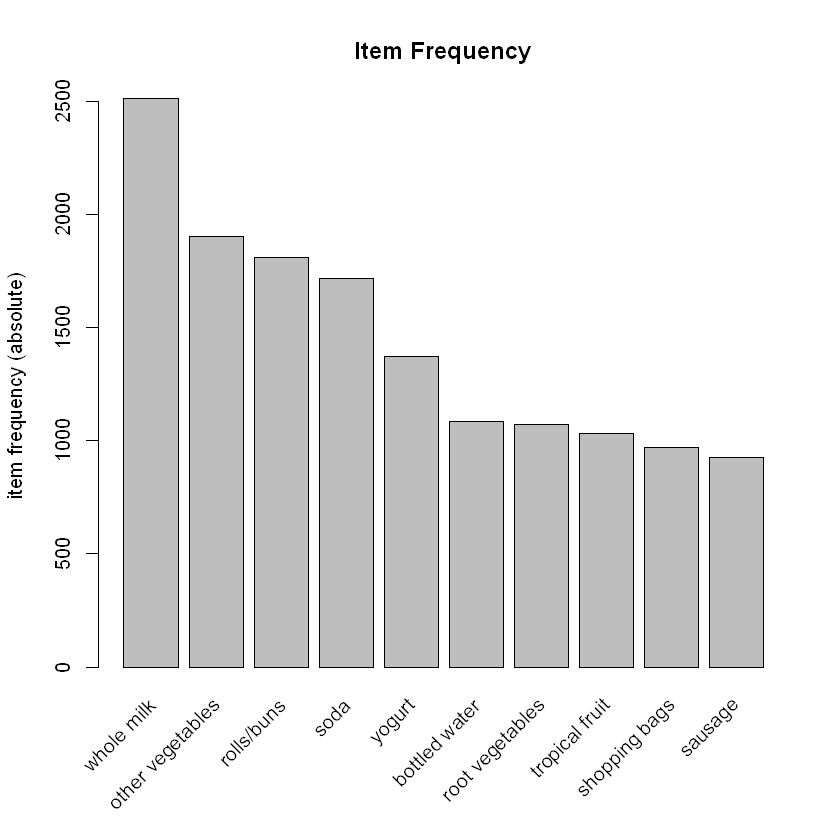

In [11]:
itemFrequencyPlot(Groceries, topN=10, type="absolute", main="Item Frequency") # plota itens frequentes

- <font color=SlateGray> Como obter as regras de recomendação de produtos? </font>

In [12]:
rules <- apriori (Groceries, parameter = list(supp = 0.001, conf = 0.5)) # Min. Support as 0.001, confidence as 0.8.
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # regras de alta confiança.
inspect(head(rules_conf)) # mostra o suporte, lift e confiança para  todas regras

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [5668 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
    lhs                     rhs                    support confidence    coverage     lift count
[1] {rice,                                                                                      
     sugar}              => {whole milk}       0.001220132          1 0.001220132 3.913

In [13]:
rules_lift <- sort (rules, by="lift", decreasing=TRUE) # regras de alta confiança.
inspect(head(rules_lift)) # mostra o suporte, lift e confiança para  todas regras

    lhs                        rhs                  support confidence    coverage     lift count
[1] {Instant food products,                                                                      
     soda}                  => {hamburger meat} 0.001220132  0.6315789 0.001931876 18.99565    12
[2] {soda,                                                                                       
     popcorn}               => {salty snack}    0.001220132  0.6315789 0.001931876 16.69779    12
[3] {flour,                                                                                      
     baking powder}         => {sugar}          0.001016777  0.5555556 0.001830198 16.40807    10
[4] {ham,                                                                                        
     processed cheese}      => {white bread}    0.001931876  0.6333333 0.003050330 15.04549    19
[5] {whole milk,                                                                                 
     Instant food pr

In [40]:
rules <- apriori(Groceries, parameter = list (supp = 0.001, conf = 0.5, maxlen=3)) # maxlen = 3 limits the elements in a rule to 3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [1472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


- <font color=SlateGray> Remove regras redundantes</font>

In [41]:
subsetRules <- which(colSums(is.subset(rules, rules)) > 1) # extrai subconjunto de regras
#length(subsetRules) 
rules <- rules[-subsetRules] # remove subconjunto. 

- <font color=SlateGray> Regras relacionadas a itens especificos - influência </font>

In [42]:
rules <- apriori (data=Groceries, parameter=list (supp=0.001,conf = 0.08), appearance = list (default="lhs",rhs="whole milk"), control = list (verbose=F)) # extrai regras que levam a compra de 'whole milk'
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # regras de alta confiança.
inspect(head(rules_conf))

    lhs                     rhs              support confidence    coverage     lift count
[1] {rice,                                                                                
     sugar}              => {whole milk} 0.001220132          1 0.001220132 3.913649    12
[2] {canned fish,                                                                         
     hygiene articles}   => {whole milk} 0.001118454          1 0.001118454 3.913649    11
[3] {root vegetables,                                                                     
     butter,                                                                              
     rice}               => {whole milk} 0.001016777          1 0.001016777 3.913649    10
[4] {root vegetables,                                                                     
     whipped/sour cream,                                                                  
     flour}              => {whole milk} 0.001728521          1 0.001728521 3.913649    17

- <font color=SlateGray> Regras relacionadas a itens especificos - consequência </font>

In [42]:
rules <- apriori (data=Groceries, parameter=list (supp=0.001,conf = 0.15,minlen=2), appearance = list(default="rhs",lhs="whole milk"), control = list (verbose=F)) # quem compra leite também compra..
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # regras de alta confiança.
inspect(head(rules_conf))

    lhs                     rhs              support confidence    coverage     lift count
[1] {rice,                                                                                
     sugar}              => {whole milk} 0.001220132          1 0.001220132 3.913649    12
[2] {canned fish,                                                                         
     hygiene articles}   => {whole milk} 0.001118454          1 0.001118454 3.913649    11
[3] {root vegetables,                                                                     
     butter,                                                                              
     rice}               => {whole milk} 0.001016777          1 0.001016777 3.913649    10
[4] {root vegetables,                                                                     
     whipped/sour cream,                                                                  
     flour}              => {whole milk} 0.001728521          1 0.001728521 3.913649    17

# <center><font color=Navy> Sumarização </font></center>

## <font color=MidnightBlue> Sumarização </font>

- Sumarização de documento único
  - Sintetiza o conteúdo de um documento
- Sumarização de múltiplos documentos 
  - Sintetiza e condensa informações a partir de diversos documentos de entrada

## <font color=MidnightBlue> Sumarização </font>

- Extrativa
  - Seleciona frases-chave do documento de origem as combina para fazer um resumo.
- Abstrativa 
  - Envolve parafrasear e encurtar partes do documento de origem. Os algoritmos de resumo de texto abstrativo criam novas frases e sentenças que transmitem as informações mais úteis do texto original.

## <center> <font color=MidnightBlue>Sumarização</font> </center>


****

## <center> Exemplo </center>

- <font color=SlateGray> Sumarização Extrativa</font>

In [ ]:
if(!require('LSAfun')) install.packages('LSAfun')
if(!require('readr')) install.packages('readr')

In [17]:
library(LSAfun)

S <- "This is just a test document. It is set up just to throw some random 
sentences in this example. So do not expect it to make much sense. Probably, even 
the summary won't be very meaningful. But this is mainly due to the document not being
meaningful at all. For test purposes, I will also include a sentence in this 
example that is not at all related to the rest of the document. Lions are larger than cats."


genericSummary(S,k=2)

Loading required package: lsa

Loading required package: SnowballC

Loading required package: rgl



[1] " For test purposes, I will also include a sentence in this \nexample that is not at all related to the rest of the document"
[2] " It is set up just to throw some random \nsentences in this example"

In [46]:
library(LSAfun)
library(readr)

txt <- read_file("biografia.txt")

txt

[1] "Joaquim Maria Machado de Assis (Rio de Janeiro, 21 de junho de 1839 — Rio de Janeiro, 29 de setembro de 1908) foi um escritor brasileiro, considerado por muitos críticos, estudiosos, escritores e leitores um dos maiores senão o maior nome da literatura do Brasil. Para o crítico literário norte-americano Harold Bloom, Machado de Assis é o maior escritor negro de todos os tempos. Escreveu em praticamente todos os gêneros literários, sendo poeta, romancista, cronista, dramaturgo, contista, folhetinista, jornalista e crítico literário. Testemunhou a Abolição da escravatura e a mudança política no país quando a República substituiu o Império, além das mais diversas reviravoltas pelo mundo em finais do século XIX e início do XX, tendo sido grande comentador e relator dos eventos político-sociais de sua época.\r\n\r\nNascido no Morro do Livramento, Rio de Janeiro, mestiço, de uma família pobre, mal estudou em escolas públicas e nunca frequentou universidade. Os biógrafos notam que, interessado pela boemia e pela corte, lutou para subir socialmente abastecendo-se de superioridade intelectual e da cultura da capital. Para isso, assumiu diversos cargos públicos, passando pelo Ministério da Agricultura, do Comércio e das Obras Públicas, e conseguindo precoce notoriedade em jornais onde publicava suas primeiras poesias e crônicas. Em sua maturidade, reunido a colegas próximos, fundou e foi o primeiro presidente unânime da Academia Brasileira de Letras.\r\n\r\nSua extensa obra constitui-se de dez romances, duzentos contos, dez peças teatrais, cinco coletâneas de poemas e sonetos, e mais de seiscentas crônicas. Machado de Assis é considerado o introdutor do Realismo no Brasil, com a publicação de Memórias Póstumas de Brás Cubas (1881). Este romance é posto ao lado de todas suas produções posteriores, Quincas Borba, Dom Casmurro, Esaú e Jacó e Memorial de Aires, ortodoxamente conhecidas como pertencentes a sua segunda fase, em que se notam traços de pessimismo e ironia, embora não haja rompimento de resíduos românticos. Dessa fase, os críticos destacam que suas melhores obras são as da Trilogia Realista. Sua primeira fase literária é constituída de obras como Ressurreição, A Mão e a Luva, Helena e Iaiá Garcia, onde notam-se características herdadas do Romantismo, ou \"convencionalismo\", como prefere a crítica moderna.\r\n\r\nSua obra foi de fundamental importância para as escolas literárias brasileiras do século XIX e do século XX e surge nos dias de hoje como de grande interesse acadêmico e público. Influenciou grandes nomes das letras, como Olavo Bilac, Lima Barreto, Drummond de Andrade, John Barth, Donald Barthelme e outros. Ainda em vida, alcançou fama e prestígio pelo Brasil e países vizinhos. Hoje em dia, por sua inovação literária e por sua audácia em temas sociais e precoces, é frequentemente visto como o escritor brasileiro de produção sem precedentes, de modo que, recentemente, seu nome e sua obra têm alcançado diversos críticos, influenciados, estudiosos e admiradores do mundo inteiro. Machado de Assis é considerado um dos grandes gênios da história da literatura, ao lado de autores como Dante, Shakespeare e Camões. Machado de Assis e Eça de Queiroz são considerados os dois maiores escritores em Língua portuguesa do século XIX. É homenageado pelo principal prêmio literário brasileiro, o Prêmio Machado de Assis."

In [37]:
text <- iconv(txt, from = 'UTF-8', to = 'ASCII//TRANSLIT') # converte caracteres acentuados para caracteres sem acentuação

In [38]:
genericSummary(text, k=2, split=c(".","!","?"," "), language="portuguese", breakdown=T)

[1] "joaquim maria machado de assis  rio de janeiro     de junho de        rio de janeiro     de setembro de       foi um escritor brasileiro  considerado por muitos criticos  estudiosos  escritores e leitores um dos maiores senao o maior nome da literatura do brasil"                                         
[2] " hoje em dia  por sua inovacao literaria e por sua audacia em temas sociais e precoces  e frequentemente visto como o escritor brasileiro de producao sem precedentes  de modo que  recentemente  seu nome e sua obra tem alcancado diversos criticos  influenciados  estudiosos e admiradores do mundo inteiro"

# <center> Aula #5 - Associação e Sumarização </center>


****

# <center> Dúvidas? </center>

# Exercícios
1. Em um texto de sua escolha faça uma **análise dos n-gramas mais comuns** e gere **regras de associação** para os **10** n-gramas mais frequentes.
2. **Modifique o código da célula "Exemplo de sumarização"** testando **diferentes parâmetros** para a função *genericSummary*. Monte uma núvem de palavras negativas vs positivas (em um único gráfico, colocando vermelho para negativas, azul para neutras e verde para positivas) ou em gráficos separados. *Referência*: [LSAfun](https://cran.r-project.org/web/packages/LSAfun/LSAfun.pdf).


------------

**Desafio**: a tarefa (preferivelmente em grupos de 2 pessoas) consiste em realizar a análise de dados provenientes do Twitter, considerando uma pessoa, empresa, produto ou serviço. 

Faça a coleta de dados (tweets) e use os scripts vistos em aula como base. Analise a polaridade dos dados comentados e procure separar os elementos positivos dos negativos, de maneira global e também, se possível, ao longo do tempo (timeline, série temporal). Gere gráficos desses elementos e faça uma análise pessoal (ou em grupo) do resultado. 

Crie um arquivo .doc (ou similar) e prepare um relatório contendo o nome da atividade, os participantes, uma descrição da pessoa, produto, serviço ou empresa analisado, a fonte de dados (e como foram obtidos) e inclua os gráficos e suas análises. Além disso, inclua uma análise SWAT / FOFA (veja material no Moodle, caso necessite), identificando forças, fraquezas, oportunidades e ameaças. Conclua eventualmente indicando dificuldades, limitações e melhorias.